# Example3 - Multisetup with Post Separate Estimation Re-scaling (PoSER) method

In this example, we'll be working with a simulated dataset generated from a finite element model of a fictitious three-story, L-shaped building. This model was created using OpenSeesPy, and the corresponding Python script can be found [here](https://github.com/dagghe/pyOMA-test-data/blob/main/test_data/3SL/model.py). 

As always, first we import the necessary modules. All the files needed to run this example are available [here](https://github.com/dagghe/pyOMA-test-data/tree/main/test_data/3SL).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pyoma2.algorithms import SSIcov
from pyoma2.setup import MultiSetup_PoSER, SingleSetup
from pyoma2.support.utils.sample_data import get_sample_data

For the **PoSER** approach, after importing the necessary modules and loading the data, the next step is to create a separate instance of the single setup class for each available dataset.

The exact natural frequencies of the system are: 2.63186, 2.69173, 3.43042, 8.29742, 8.42882, 10.6272, 14.0053, 14.093, 17.5741

In [2]:
# import data files
set1 = np.load(get_sample_data(filename="set1.npy", folder="3SL"), allow_pickle=True)
set2 = np.load(get_sample_data(filename="set2.npy", folder="3SL"), allow_pickle=True)
set3 = np.load(get_sample_data(filename="set3.npy", folder="3SL"), allow_pickle=True)

# create single setup
ss1 = SingleSetup(set1, fs=100)
ss2 = SingleSetup(set2, fs=100)
ss3 = SingleSetup(set3, fs=100)

# Detrend and decimate
ss1.decimate_data(q=2)
ss2.decimate_data(q=2)
ss3.decimate_data(q=2)

2024-09-12 14:04:01,097 - pyoma2.support.utils.sample_data - INFO - set1.npy already exists locally. (sample_data:49)
2024-09-12 14:04:01,102 - pyoma2.support.utils.sample_data - INFO - set2.npy already exists locally. (sample_data:49)
2024-09-12 14:04:01,107 - pyoma2.support.utils.sample_data - INFO - set3.npy already exists locally. (sample_data:49)


The process for obtaining the modal properties from each setup remains the same as described in the example for the single setup. 

2024-09-12 14:04:01,199 - pyoma2.setup.base - INFO - Running SSIcov_s1... (base:123)
2024-09-12 14:04:01,199 - pyoma2.functions.ssi - INFO - Assembling Hankel matrix method: cov... (ssi:82)
2024-09-12 14:04:02,490 - pyoma2.functions.ssi - INFO - SSI for increasing model order... (ssi:359)
100%|████████████████████████████████████████████████████████████████████████████████| 81/81 [00:00<00:00, 2333.67it/s]
2024-09-12 14:04:02,562 - pyoma2.functions.ssi - INFO - Calculating modal parameters... (ssi:531)
100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 472.49it/s]
2024-09-12 14:04:03,580 - pyoma2.setup.base - INFO - all done (base:102)
2024-09-12 14:04:03,582 - pyoma2.setup.base - INFO - Running SSIcov_s2... (base:123)
2024-09-12 14:04:03,583 - pyoma2.functions.ssi - INFO - Assembling Hankel matrix method: cov... (ssi:82)
2024-09-12 14:04:04,445 - pyoma2.functions.ssi - INFO - SSI for increasing model order... (ssi:359)
100%|████

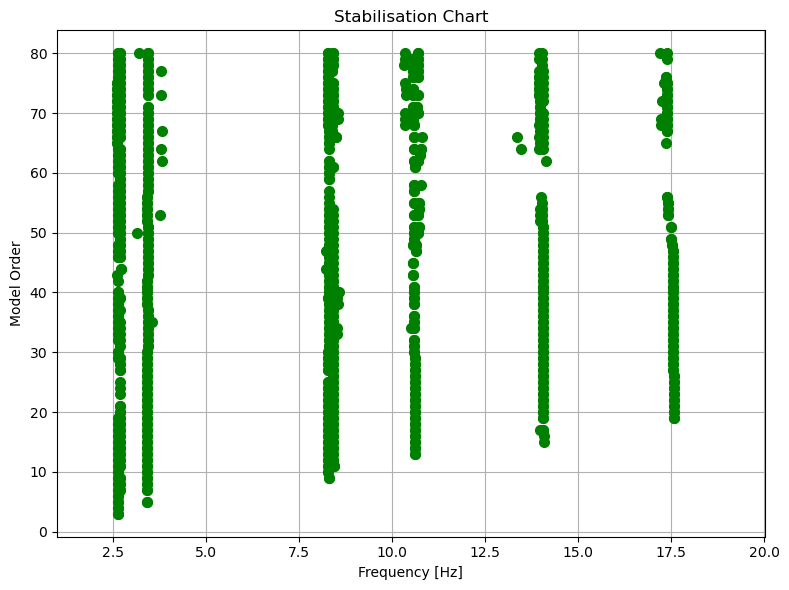

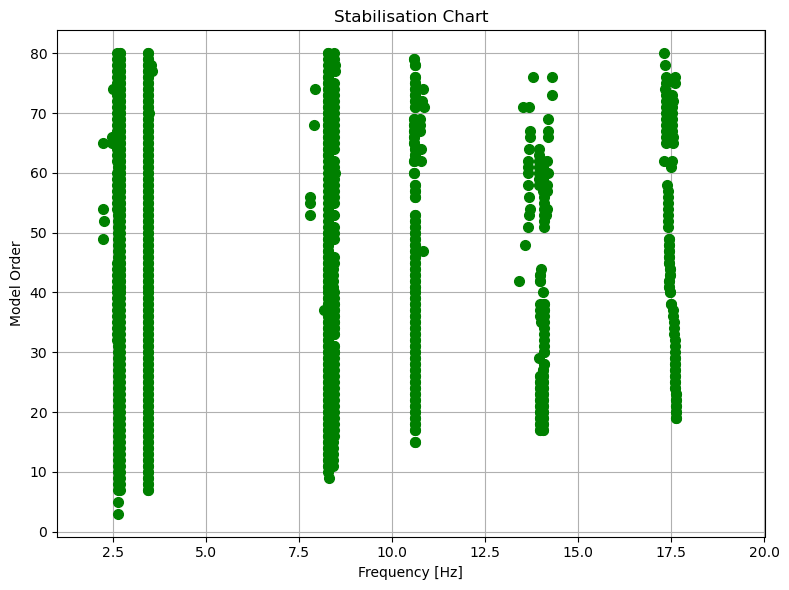

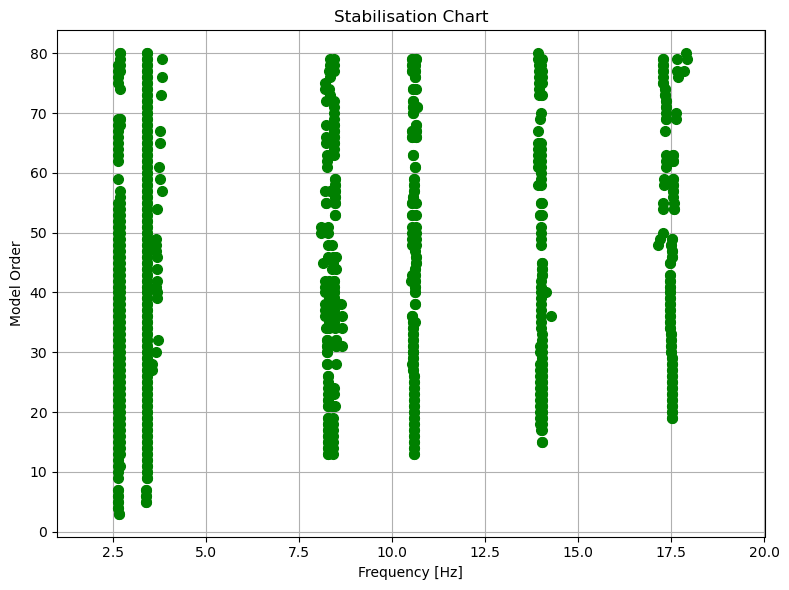

In [3]:
# Initialise the algorithms for setup 1
ssicov1 = SSIcov(name="SSIcov_s1", method="cov", br=50, ordmax=80)
# Add algorithms to the class
ss1.add_algorithms(ssicov1)
ss1.run_all()

# Initialise the algorithms for setup 2
ssicov2 = SSIcov(name="SSIcov_s2", method="cov", br=50, ordmax=80)
ss2.add_algorithms(ssicov2)
ss2.run_all()

# Initialise the algorithms for setup 3
ssicov3 = SSIcov(name="SSIcov_s3", method="cov", br=50, ordmax=80)
ss3.add_algorithms(ssicov3)
ss3.run_all()

# Plot stabilisation chart
_, _ = ssicov1.plot_stab(freqlim=(1,20))
_, _ = ssicov2.plot_stab(freqlim=(1,20))
_, _ = ssicov3.plot_stab(freqlim=(1,20))

# Extract results 
ss1.mpe(
    "SSIcov_s1",
    sel_freq=[2.63, 2.69, 3.43, 8.29, 8.42, 10.62, 14.00, 14.09, 17.57],
    order=50)
ss2.mpe(
    "SSIcov_s2",
    sel_freq=[2.63, 2.69, 3.43, 8.29, 8.42, 10.62, 14.00, 14.09, 17.57],
    order=40)
ss3.mpe(
    "SSIcov_s3",
    sel_freq=[2.63, 2.69, 3.43, 8.29, 8.42, 10.62, 14.00, 14.09, 17.57],
    order=40)

After analyzing all datasets, the ```MultiSetup_PoSER``` class can be instantiated by passing the processed single setup and the lists of reference indices. Subsequently, the ```merge_results()``` method is used to combine the results.

In [4]:
# reference indices
ref_ind = [[0, 1, 2], [0, 1, 2], [0, 1, 2]]
# Creating Multi setup
msp = MultiSetup_PoSER(ref_ind=ref_ind, single_setups=[ss1, ss2, ss3], names=["SSIcov"])

# Merging results from single setups
result = msp.merge_results()

# dictionary of merged results
res_ssicov = dict(result[SSIcov.__name__])
result["SSIcov"].Fn

2024-09-12 14:04:10,337 - pyoma2.setup.multi - INFO - Merging SSIcov results for SSIcov group (multi:205)
2024-09-12 14:04:10,339 - pyoma2.setup.multi - INFO - Merging SSIcov_s1 results (multi:211)
2024-09-12 14:04:10,341 - pyoma2.setup.multi - INFO - Merging SSIcov_s2 results (multi:211)
2024-09-12 14:04:10,342 - pyoma2.setup.multi - INFO - Merging SSIcov_s3 results (multi:211)


array([ 2.63245926,  2.69030811,  3.4256547 ,  8.29328508,  8.42526299,
       10.60096486, 14.03416869, 14.09286017, 17.46931459])

Once the class has been instantiated we can define the "global" geometry on it and then plot or animate the mode shapes

In [5]:
# Geometry 1
_geo1 = get_sample_data(filename="Geo1.xlsx", folder="3SL")
# Geometry 2
_geo2 = get_sample_data(filename="Geo2.xlsx", folder="3SL")

# Define geometry1
msp.def_geo1_by_file(_geo1)

# Define geometry 2
msp.def_geo2_by_file(_geo2)

2024-09-12 14:04:10,359 - pyoma2.support.utils.sample_data - INFO - Geo1.xlsx already exists locally. (sample_data:49)
2024-09-12 14:04:10,361 - pyoma2.support.utils.sample_data - INFO - Geo2.xlsx already exists locally. (sample_data:49)


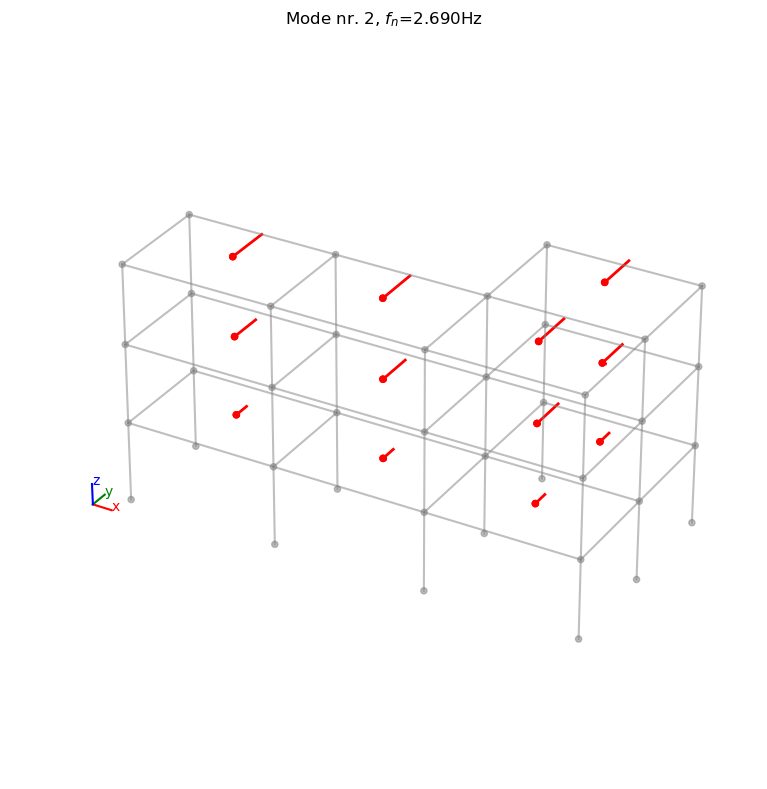

In [6]:
# define results variable
algoRes = result[SSIcov.__name__]

# Plot mode 2 (geometry 1)
_, _ = msp.plot_mode_geo1(
      algo_res=algoRes, mode_nr=2, scaleF=2)

In [7]:
# Plot mode 1 (geometry 2, pyvista)
_ = msp.plot_mode_geo2(
      algo_res=algoRes, mode_nr=1, scaleF=3, notebook=True)

Widget(value='<iframe src="http://localhost:58342/index.html?ui=P_0x242c8a8fb80_0&reconnect=auto" class="pyvis…

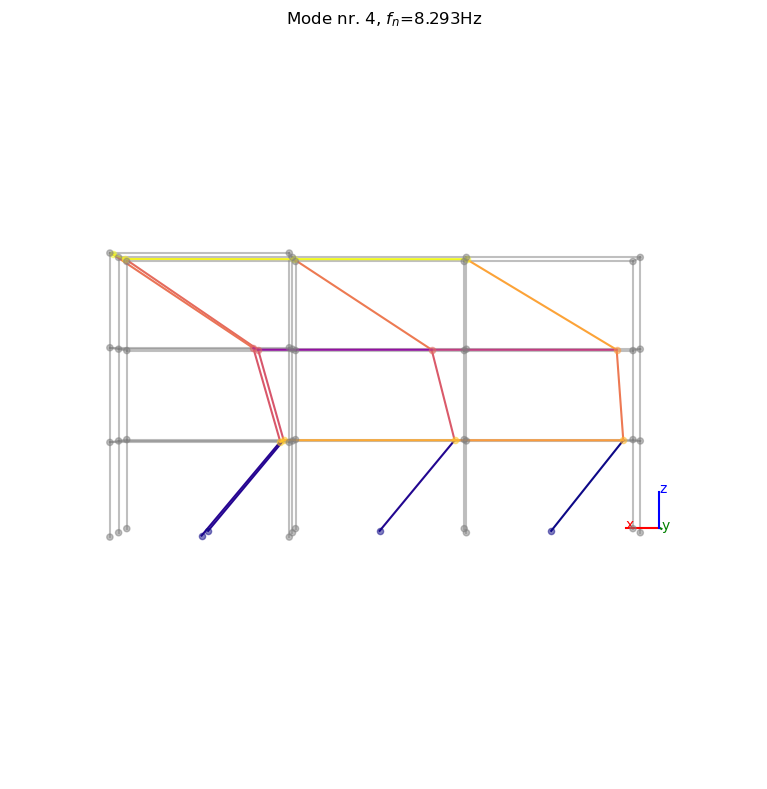

In [8]:
# Plot mode 4 (geometry 2, matplotlib)
_, _ = msp.plot_mode_geo2_mpl(
      algo_res=algoRes, mode_nr=4, view="xz", scaleF=3)

In [9]:
# Animate mode 5 (geometry 2, pyvista)
_ = msp.anim_mode_geo2(
      algo_res=algoRes, mode_nr=5, scaleF=3, notebook=True)

In [10]:
algoRes.Fn

array([ 2.63245926,  2.69030811,  3.4256547 ,  8.29328508,  8.42526299,
       10.60096486, 14.03416869, 14.09286017, 17.46931459])